Task 2: Netflix Titles Data Explorer


Objective:


Perform exploratory data analysis on a Netflix dataset to answer questions like content distribution over years, most common genres, and top countries.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Set visualization style
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Load the dataset
# Added encoding to handle potential UnicodeDecodeError
df = pd.read_csv('netflix_titles.csv', encoding='latin-1')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   

In [ ]:
# Function to handle missing values
def clean_dataset(df):
    # Check missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Handle missing values
    # Fill 'director', 'cast', 'country' with 'Unknown'
    df['director'] = df['director'].fillna('Unknown')
    df['cast'] = df['cast'].fillna('Unknown')
    df['country'] = df['country'].fillna('Unknown')

    # For date_added, drop rows as it's a small percentage
    df = df.dropna(subset=['date_added'])

    # For rating and duration, fill with mode
    df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
    df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

    return df

# Clean the dataset
df = clean_dataset(df)
print("\nAfter cleaning - Missing Values:")
print(df.isnull().sum())


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

After cleaning - Missing Values:
show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Unnamed: 12     8799
Unnamed: 13     8799
Unnamed: 14     8799
Unnamed: 15     8799
Unnamed: 16     8799
Unnamed: 17     8799
Unnamed: 18 

/tmp/ipython-input-4-1598311705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
/tmp/ipython-input-4-1598311705.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].fillna(df['duration'].mode()[0])


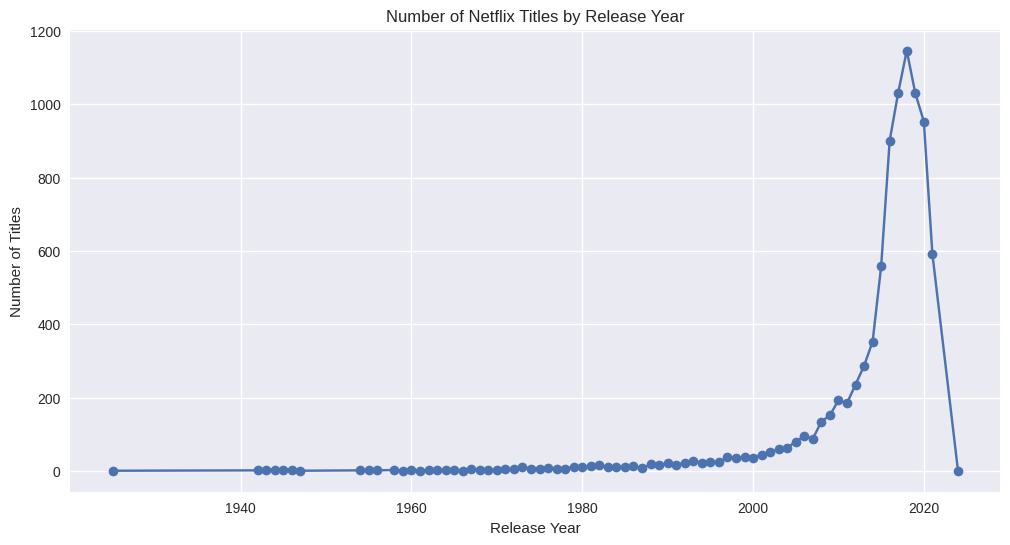

In [ ]:
# Function to analyze titles by year
def analyze_titles_by_year(df):
    # Convert release_year to numeric
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

    # Group by release_year and count titles
    yearly_counts = df.groupby('release_year').size().reset_index(name='count')

    # Create a line plot for titles by year
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_counts['release_year'], yearly_counts['count'], marker='o')
    plt.title('Number of Netflix Titles by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Titles')
    plt.grid(True)
    plt.show()

    return yearly_counts

# Analyze titles by year and get the yearly counts
yearly_counts_df = analyze_titles_by_year(df)

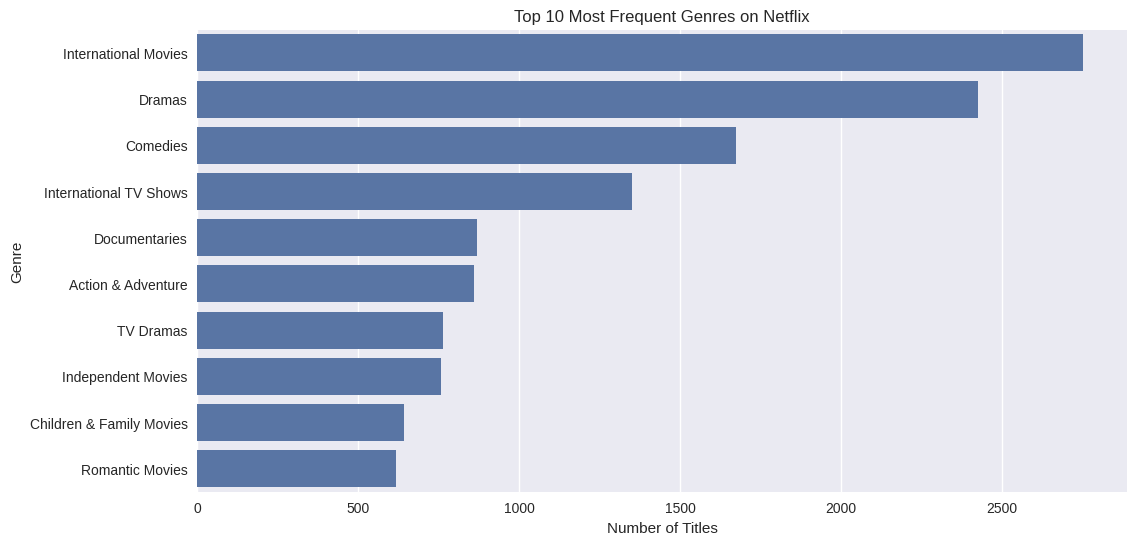

In [ ]:
# Function to analyze genres
def analyze_genres(df):
    # Split genres and count occurrences
    all_genres = []
    df['listed_in'].str.split(', ').apply(lambda x: all_genres.extend(x))

    # Count genres
    genre_counts = Counter(all_genres)

    # Convert to DataFrame
    genre_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
    genre_df.columns = ['genre', 'count']
    genre_df = genre_df.sort_values('count', ascending=False).head(10)

    # Create bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=genre_df, x='count', y='genre')
    plt.title('Top 10 Most Frequent Genres on Netflix')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()

    return genre_df

# Analyze genres and get the genre counts
genre_df = analyze_genres(df)

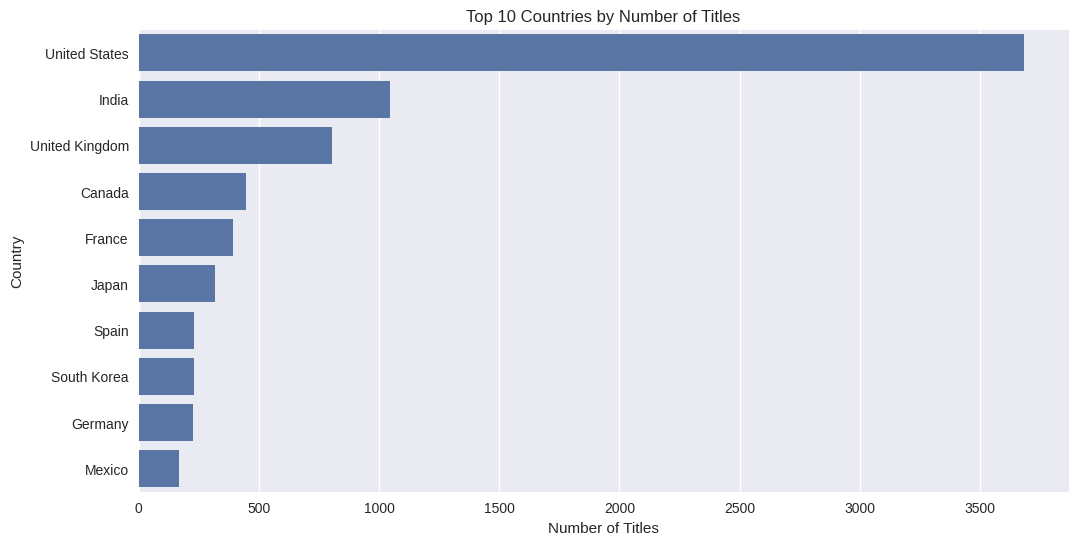

In [ ]:
# Function to analyze countries
def analyze_countries(df):
    # Split countries and count occurrences
    all_countries = []
    df['country'].str.split(', ').apply(lambda x: all_countries.extend(x))

    # Remove 'Unknown' entries
    all_countries = [c for c in all_countries if c != 'Unknown']

    # Count countries
    country_counts = Counter(all_countries)

    # Convert to DataFrame
    country_df = pd.DataFrame.from_dict(country_counts, orient='index').reset_index()
    country_df.columns = ['country', 'count']
    country_df = country_df.sort_values('count', ascending=False).head(10)

    # Create bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=country_df, x='count', y='country')
    plt.title('Top 10 Countries by Number of Titles')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.show()

    return country_df

# Analyze countries and get the country counts
country_df = analyze_countries(df)

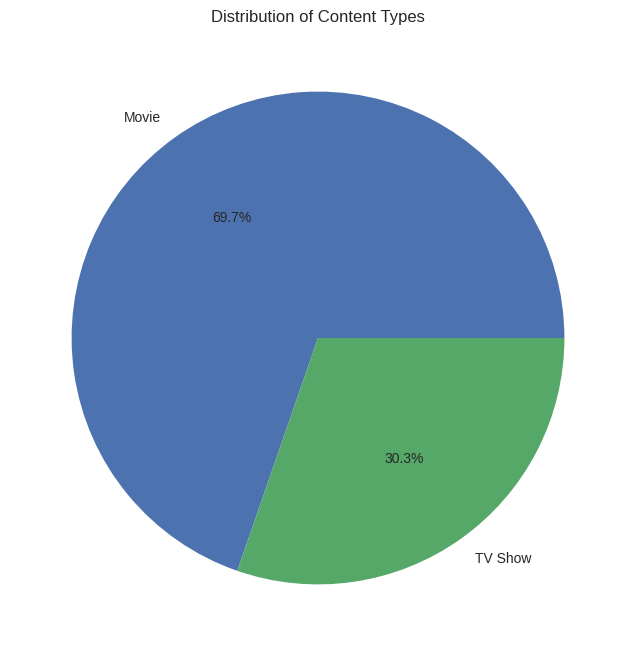

In [ ]:
# Function to analyze content type
def analyze_content_type(df):
    content_type = df['type'].value_counts()

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(content_type, labels=content_type.index, autopct='%1.1f%%')
    plt.title('Distribution of Content Types')
    plt.show()

    return content_type

# Analyze content type and get the counts
content_type = analyze_content_type(df)

### Narrative and Insights
1. **Data Cleaning**: We handled missing values by filling categorical columns with 'Unknown' and using mode for rating and duration. Rows with missing 'date_added' were dropped due to their small proportion.

2. **Titles by Year**: The line chart shows the growth of Netflix content over time. Recent years typically have more titles, reflecting Netflix's expansion in content production.

3. **Genres**: The bar chart of top genres reveals popular categories like Drama, Comedy, and Documentaries, indicating viewer preferences and Netflix's content strategy.

4. **Countries**: The United States likely dominates content production, followed by other countries like India and the UK, showing Netflix's global reach but with a strong US focus.

5. **Content Type**: The pie chart shows the balance between Movies and TV Shows, with movies typically comprising a larger portion of the catalog.

### Notes
- Replace 'netflix_titles.csv' with the actual path to your dataset.
- The dataset is assumed to have columns like 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'.
- If you encounter issues with the dataset, you can download it from Kaggle: [Netflix Movies and TV Shows Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows).
- The charts are created using both Matplotlib/Seaborn for immediate visualization and Chart.js format for interactive web display.

This code provides a modular, reusable approach to explore the Netflix dataset with clear visualizations and insights. Let me know if you need help running the code or want to extend the analysis!